# 붓꽃 데이터의 클러스터링

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()


iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
#iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [7]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
# target과 비교
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [9]:
# 차원을 줄여서 군집화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

#주성분1, 주성분2
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


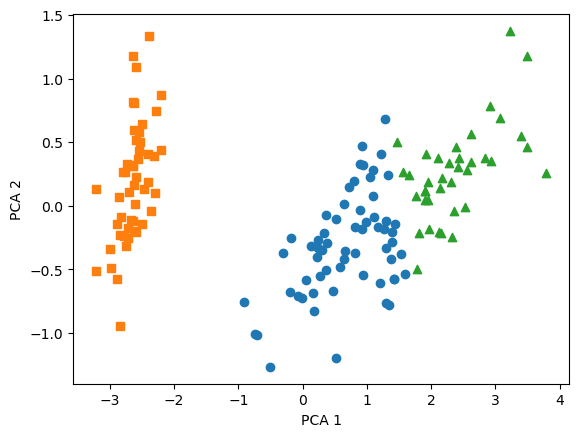

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 클러스터링을 위한 데이터셋 생성

In [11]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [12]:
cluster_df = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


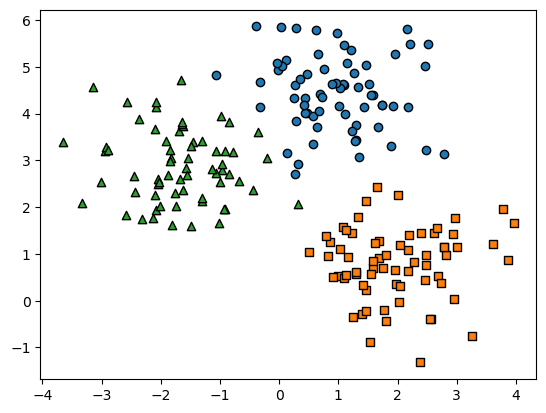

In [15]:
import numpy as np
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

In [17]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = KM.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels
cluster_df.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


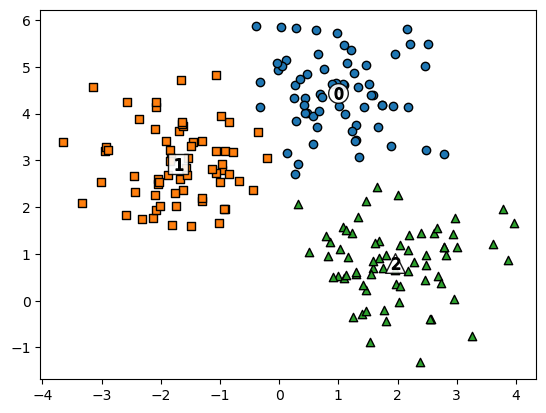

In [20]:
import numpy as np
cluster_list = np.unique(cluster_labels)

centers = KM.cluster_centers_   # 각 클러스터의 중심 위치 좌표

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for cluster in cluster_list:
    # 각 클러스터 레이블이 cluster인 데이터 프레의 값 시각화
    label_cluster = cluster_df[cluster_df['kmeans_label']==cluster]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[cluster])

    #각 클러스터의 중심위치 좌표 시각화
    center_x_y = centers[cluster]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[cluster])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % cluster)

In [21]:
cluster_df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

# silhouette 계수 측정